## Практическое занятие 9. Анализ рынка недвижимости в Санкт-Петербурге

<div class="alert alert-block alert-success">
</b> ФИО, группа: </b> Безгребельная, УСБО-01-23
</div>

В таблице содержатся следующие данные:
*    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*    balcony — число балконов
*    ceiling_height — высота потолков (м)
*    cityCenters_nearest — расстояние до центра города (м)
*    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*    first_day_exposition — дата публикации
*    floor — этаж
*    floors_total — всего этажей в доме
*    is_apartment — апартаменты (булев тип)
*    kitchen_area — площадь кухни в квадратных метрах (м²)
*    last_price — цена на момент снятия с публикации
*    living_area — жилая площадь в квадратных метрах (м²)
*    locality_name — название населённого пункта
*    open_plan — свободная планировка (булев тип)
*    parks_around3000 — число парков в радиусе 3 км
*    parks_nearest — расстояние до ближайшего парка (м)
*    ponds_around3000 — число водоёмов в радиусе 3 км
*    ponds_nearest — расстояние до ближайшего водоёма (м)
*    rooms — число комнат
*    studio — квартира-студия (булев тип)
*    total_area — площадь квартиры в квадратных метрах (м²)
*    total_images — число фотографий квартиры в объявлении

### Часть 1. Предварительный анализ

<div class="alert alert-block alert-warning">
<b> 1.  Импортируйте необходимые библиотеки и установите датасет для анализа: </b>
</div>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('real_estate_data.csv', sep = "\t")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'real_estate_data.csv'

<div class="alert alert-block alert-warning">
<b> 2. Выведите описательные статистики для каждого столбца: </b>
</div>

In [589]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-block alert-warning">
<b> 3.  Выведите количество строк и столбцов: </b>
</div>

In [592]:
df.shape

(23699, 22)

<div class="alert alert-block alert-warning">
<b> 4.  Выведите количество пропущенных значений в каждом столбце данных: </b>
</div>

In [595]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-warning">
<b> 5.  Выведите процент пропущенных значений в каждом из столбцов: </b>
</div>

In [598]:
round(df.isna().sum()/23699, 4)*100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

<div class="alert alert-block alert-warning">
<b> 6. Подумайте, исходя из рассчитанного процента пропущенных значений, какие столбцы необходимо удалить целиком, а в каких столбцах достаточно заменить пропуски на среднее либо медиану. Обоснуйте свой выбор, написав краткий вывод.   </b>
</div>

В столбцах с процентом пропущенных значений меньше 50% заменяем NAN на среднее или медиану, в остальных случаях удаляем столбец. 
Среднее или медиана в столбцах is_apartment, parks_nearest, ponds_nearest не будут репрезентативными для всех данных.

<div class="alert alert-block alert-warning">
<b> 7. Выясните, есть ли дубликаты строк в датафрейме. Если есть - удалите их.   </b>
</div>

In [603]:
df[df.duplicated()]
# дубликатов нет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div class="alert alert-block alert-warning">
<b> 8. Выведите тип данных для каждого столбца. Измените тип даты публикации first_day_exposition на корректный.   </b>
</div>

In [606]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [608]:
df.first_day_exposition = pd.to_datetime(df.first_day_exposition)
df.first_day_exposition

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

### Часть 2. Расчет дополнительных столбцов

<div class="alert alert-block alert-warning">
<b> 9. Вычислите новый столбец - цена квадратного метра жилых помещений.   </b>
</div>

In [699]:
df['price_per_square'] = df.last_price /df.living_area
df['price_per_square']

0        254901.960784
1        180107.526882
2        151486.880466
3                  NaN
4        312500.000000
             ...      
23694    132332.878581
23695     81578.947368
23696     84175.084175
23697              NaN
23698    109756.097561
Name: price_per_square, Length: 23699, dtype: float64

<div class="alert alert-block alert-warning">
<b> 10. Создайте 2 новых столбца - месяц и год публикации объявления.   </b>
</div>

In [615]:
df['month_of_publ'] = df.first_day_exposition.dt.month
df['year_of_publ'] = df.first_day_exposition.dt.year
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,month_of_publ,year_of_publ
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254901.960784,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.526882,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.880466,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.000000,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,132332.878581,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,81578.947368,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84175.084175,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,NaN,3,2017


<div class="alert alert-block alert-warning">
<b> 11. Добавьте столбец с днем публикации объявления - они должны называться русскими наименованиями.  </b>
</div>

In [618]:
def to_rus(day):
    trans = {
        1: 'Понедельник',
        2: 'Вторник',
        3: 'Среда',
        4: 'Четверг',
        5: 'Пятница',
        6: 'Суббота',
        7: 'Воскресенье'
    }
    return trans[day]
    
df['day_of_week'] = df.first_day_exposition.dt.dayofweek+1
df['day_of_week'] = df.day_of_week.apply(to_rus)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,month_of_publ,year_of_publ,day_of_week
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,254901.960784,3,2019,Четверг
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,180107.526882,12,2018,Вторник
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,151486.880466,8,2015,Четверг
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,7,2015,Пятница
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,312500.000000,6,2018,Вторник
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,4232.0,1.0,796.0,3.0,381.0,NaN,132332.878581,3,2017,Вторник
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,81578.947368,1,2018,Понедельник
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84175.084175,2,2018,Воскресенье
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,10364.0,2.0,173.0,3.0,196.0,602.0,NaN,3,2017,Вторник


<div class="alert alert-block alert-warning">
<b> 12. Создайте новый столбец с текстовыми наименованиями этажей (первый, второй, третий, четвертый, пятый, выше пятого).   </b>
</div>

In [621]:
def floors_in_rus(floor):
    translation = {1: 'первый', 2: 'второй', 3: 'третий', 4: 'четвертый'}
    if floor in translation.keys():
        return translation[floor]
    else:
        return 'выше пятого'
df['floor_in_rus'] = df.floor.apply(floors_in_rus)
df[['floor', 'floor_in_rus']]

,floor,floor_in_rus
0,8,выше пятого
1,1,первый
2,4,четвертый
3,9,выше пятого
4,13,выше пятого
...,...,...
23694,3,третий
23695,4,четвертый
23696,1,первый
23697,12,выше пятого


<div class="alert alert-block alert-warning">
<b> 13. Создайте столбец, отвечающий на вопрос - какой процент занимает жилая площадь в общей площади помещения?   </b>
</div>

In [624]:
df['percent_of_living_space_in_total'] = round(df.living_area / df.total_area * 100, 2)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,month_of_publ,year_of_publ,day_of_week,floor_in_rus,percent_of_living_space_in_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,NaN,254901.960784,3,2019,Четверг,выше пятого,47.22
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,0.0,NaN,81.0,180107.526882,12,2018,Вторник,первый,46.04
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,151486.880466,8,2015,Четверг,четвертый,61.25
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,84.0,3.0,234.0,424.0,NaN,7,2015,Пятница,выше пятого,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,312500.000000,6,2018,Вторник,выше пятого,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,796.0,3.0,381.0,NaN,132332.878581,3,2017,Вторник,третий,54.78
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,45.0,81578.947368,1,2018,Понедельник,четвертый,64.41
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,84175.084175,2,2018,Воскресенье,первый,52.38
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,173.0,3.0,196.0,602.0,NaN,3,2017,Вторник,выше пятого,NaN


### Часть 3. Анализ данных

<div class="alert alert-block alert-warning">
<b> 14. Выведите описательные статистики  столбцов с площадью, ценой, числом комнат и высотой потолков.   </b>
</div>

In [628]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


<div class="alert alert-block alert-warning">
<b> 15. Создайте дополнительный датасет с жилыми помещениями без комнат. Используя различные инструменты, ответьте на вопросы: 
    
* В каком диапазоне цен находится данный вид недвижимости?
* Какова наибольшая площадь этих помещений? В каком городе находится данное помещение с самой большой площадью?
</b>
</div>

In [631]:
df_with_no_rooms = df[df.rooms == 0]

min_price_for_space_with_no_rooms = min(df_with_no_rooms.last_price)
max_price_for_space_with_no_rooms = max(df_with_no_rooms.last_price)

print(f'Ценовой диапазон недвижимости без комнат -- {min_price_for_space_with_no_rooms, max_price_for_space_with_no_rooms}')
print(f'Наибольшая площадь таких помещений равна {max(df_with_no_rooms.total_area)}, данное помещение находится в городе {df_with_no_rooms.locality_name[df_with_no_rooms.total_area == max(df_with_no_rooms.total_area)].iloc[0]}')


Ценовой диапазон недвижимости без комнат -- (945750.0, 71000000.0)
Наибольшая площадь таких помещений равна 371.0, данное помещение находится в городе Санкт-Петербург


<div class="alert alert-block alert-warning">
<b> 16. Постройте тепловую карту корреляций зависимости цен квартир от числа комнат. Сделайте выводы.   </b>
</div>

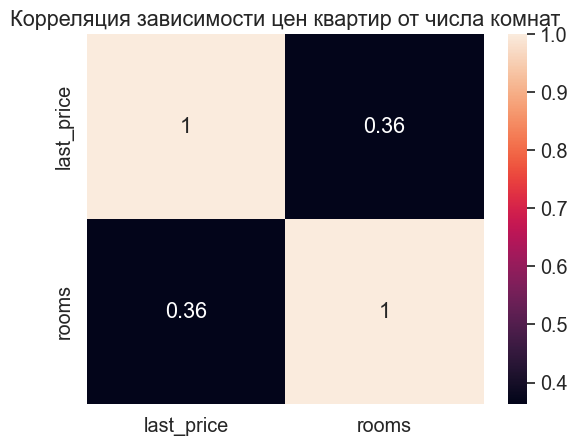

,last_price,rooms
last_price,1.000000,0.363343
rooms,0.363343,1.000000


In [634]:
sns.heatmap(df[['last_price', 'rooms']].corr(), annot=True) #перечислите переменные в скобках
plt.title("Корреляция зависимости цен квартир от числа комнат") #дайте название графику
plt.show()
df[['last_price', 'rooms']].corr()

Наблюдается умеренная степень зависимости между ценами квартир и числом комнат.

<div class="alert alert-block alert-warning">
<b> 17. Оцените дополнительные факторы, влияющие на стоимость квартир. Посчитайте соответствующие коэффициенты корреляции Пирсона и другие показатели тесноты связи. Оцените значимость взаимосвязи. Постройте диаграммы рассеяния для значимых корреляций.   </b>
</div>

In [715]:
corr_df = (df[['airports_nearest','balcony', 'ceiling_height', 'cityCenters_nearest', 
     'days_exposition', 'floor', 'floors_total','kitchen_area', 'last_price', 'living_area', 
    'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'rooms', 'total_area', 'total_images']]).corr()

# Коэффициенты корреляции Пирсона
pearson_corr = pd.DataFrame(corr_df['last_price'])
corr_df

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,floor,floors_total,kitchen_area,last_price,living_area,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,total_area,total_images
airports_nearest,1.000000,0.066834,-0.023947,0.272184,-0.018271,0.071597,0.108288,0.008200,-0.026239,-0.057912,0.000759,-0.070058,-0.049583,0.014049,-0.061199,-0.030753,-0.002298
balcony,0.066834,1.000000,0.040523,0.051051,-0.032909,0.168773,0.194065,0.098634,0.029646,0.018849,-0.082850,0.052328,-0.032709,0.010847,0.017991,0.047937,0.121693
ceiling_height,-0.023947,0.040523,1.000000,-0.091689,0.019091,-0.011798,-0.028732,0.087641,0.085430,0.090650,0.065915,-0.019167,0.078209,-0.059090,0.054457,0.095490,-0.001987
cityCenters_nearest,0.272184,0.051051,-0.091689,1.000000,-0.060714,0.009084,0.019774,-0.190049,-0.206747,-0.231368,-0.161738,-0.040650,-0.074577,0.028903,-0.184864,-0.231446,-0.047666
days_exposition,-0.018271,-0.032909,0.019091,-0.060714,1.000000,-0.039463,-0.052234,0.100586,0.081146,0.142454,0.060491,0.023254,0.073162,-0.077879,0.126961,0.149675,-0.026657
floor,0.071597,0.168773,-0.011798,0.009084,-0.039463,1.000000,0.678059,0.135531,0.026576,-0.097210,-0.163784,0.073045,-0.076312,0.024850,-0.150862,-0.024754,0.031340
floors_total,0.108288,0.194065,-0.028732,0.019774,-0.052234,0.678059,1.000000,0.163944,-0.006984,-0.169311,-0.252833,0.097527,-0.122735,0.038864,-0.228215,-0.075774,0.010427
kitchen_area,0.008200,0.098634,0.087641,-0.190049,0.100586,0.135531,0.163944,1.000000,0.519869,0.428674,0.087503,0.029641,0.150148,-0.105223,0.269945,0.609121,0.104756
last_price,-0.026239,0.029646,0.085430,-0.206747,0.081146,0.026576,-0.006984,0.519869,1.000000,0.566492,0.151058,-0.016414,0.159996,-0.084809,0.363343,0.653675,0.104473
living_area,-0.057912,0.018849,0.090650,-0.231368,0.142454,-0.097210,-0.169311,0.428674,0.566492,1.000000,0.184453,-0.050167,0.148933,-0.081674,0.845977,0.939537,0.104780


In [640]:
# Заметная степень зависимости [0,5; 0,7)
sign_corr = corr_df[corr_df['last_price']>=0.5].last_price
sign_corr

kitchen_area    0.519869
last_price      1.000000
living_area     0.566492
total_area      0.653675
Name: last_price, dtype: float64

Text(0, 0.5, 'kitchen / living / total  area')

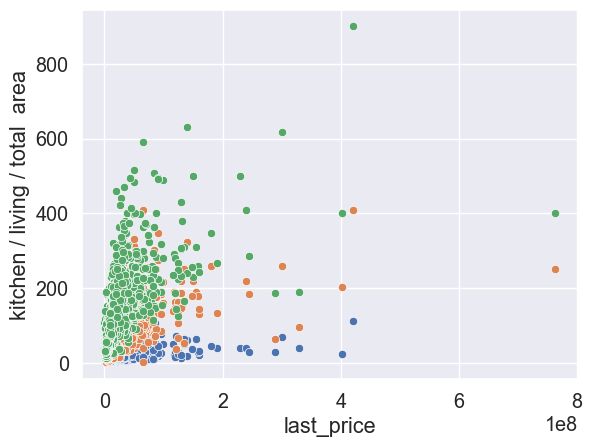

In [756]:
sns.set(font_scale=1.3)
sns.scatterplot(
    x= df.last_price, 
    y= df.kitchen_area,
    data=df)
sns.scatterplot(
    x= df.last_price, 
    y= df.living_area,
    data=df)
sns.scatterplot(
    x= df.last_price, 
    y= df.total_area,
    data=df)
plt.xlabel('last_price')
plt.ylabel('kitchen / living / total  area')

<div class="alert alert-block alert-warning">
<b> 18. Сколько дней необходимо для продажи квартир? Постройте гистограмму, отвечающую на этот вопрос.   </b>
</div>

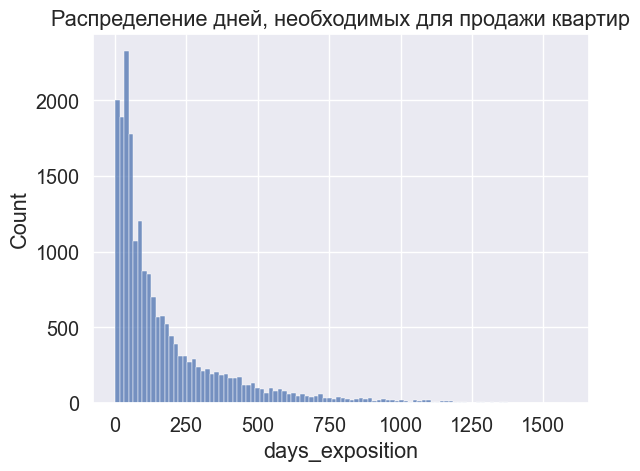

In [644]:
sns.histplot(data=df, x='days_exposition', bins=100)
plt.title("Распределение дней, необходимых для продажи квартир")
plt.show()

<div class="alert alert-block alert-warning">
<b> 19. Постройте ящики с усами, отображающие распределения площади квартир, цены, высоты потолков. Чем характеризуются выбросы в данных?    </b>
</div>

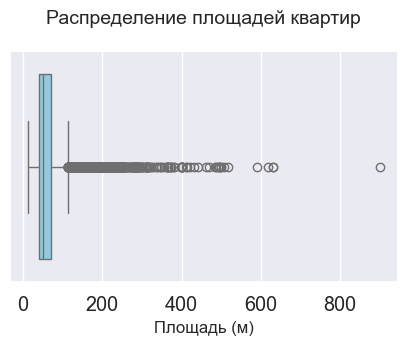

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [646]:
plt.figure(figsize=(5, 3))

sns.boxplot(x=df['total_area'], color='skyblue')

plt.title('Распределение площадей квартир', fontsize=14, pad=20)
plt.xlabel('Площадь (м)', fontsize=12)
plt.grid(axis='x', alpha=1)

plt.show()
df['total_area'].describe()

***Большое число выбросов связано с неравномерным распределением показателя.***

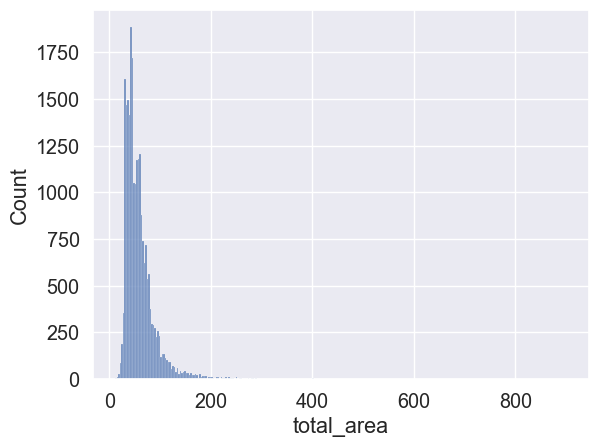

In [649]:
sns.histplot(data=df, x='total_area', bins=300)
plt.show()

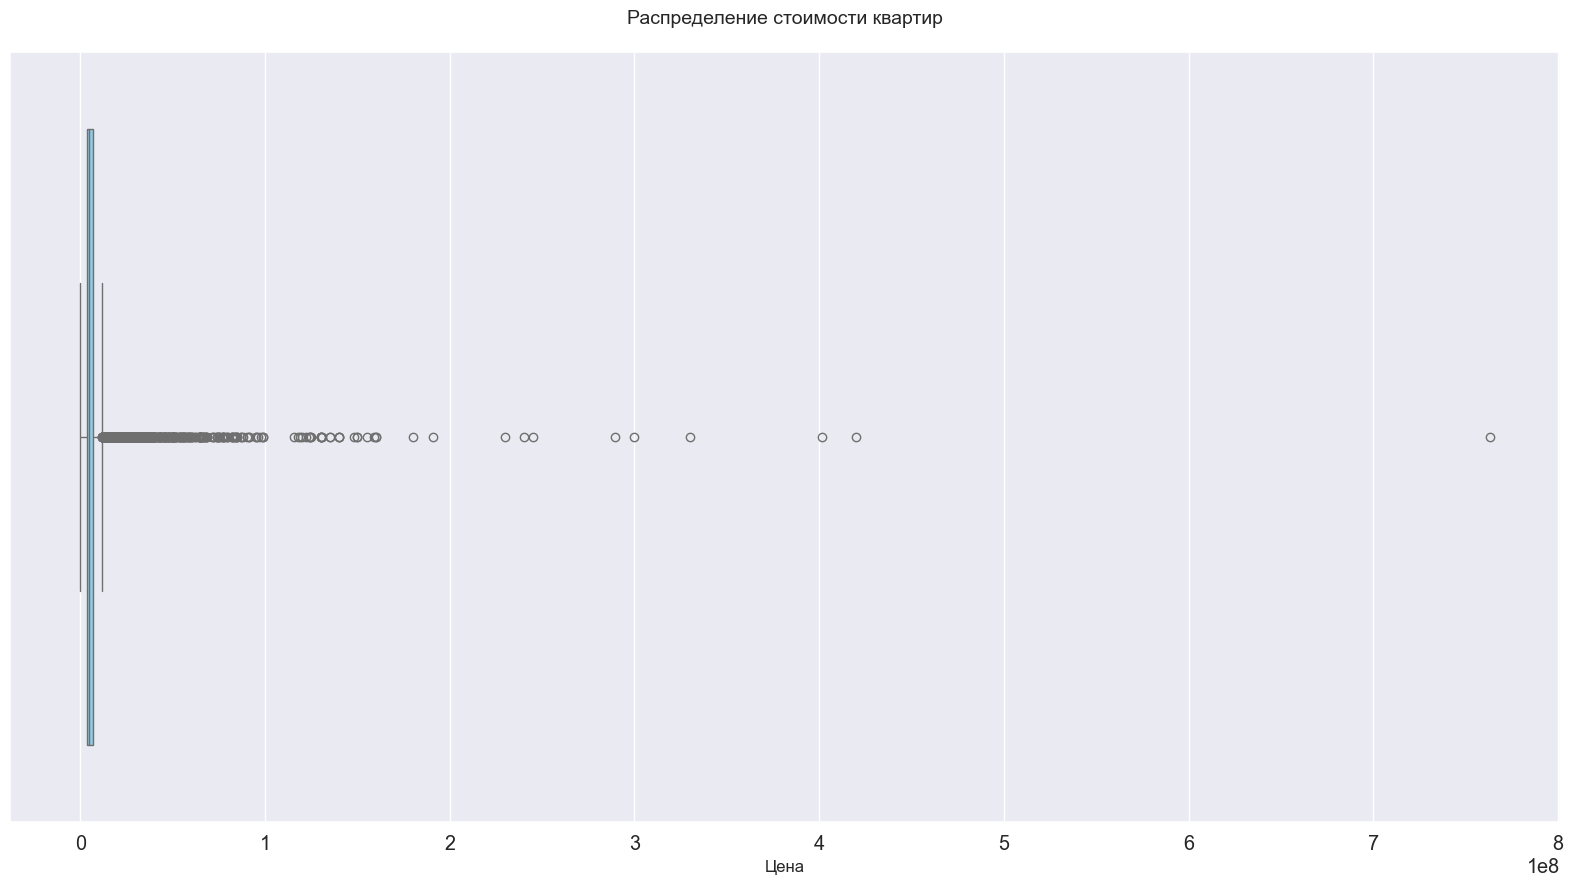

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [650]:
plt.figure(figsize=(20, 10))

sns.boxplot(x=df['last_price'], color='skyblue')

plt.title('Распределение стоимости квартир', fontsize=14, pad=20)
plt.xlabel('Цена', fontsize=12)
plt.grid(axis='x', alpha=1)

plt.show()
df['last_price'].describe()

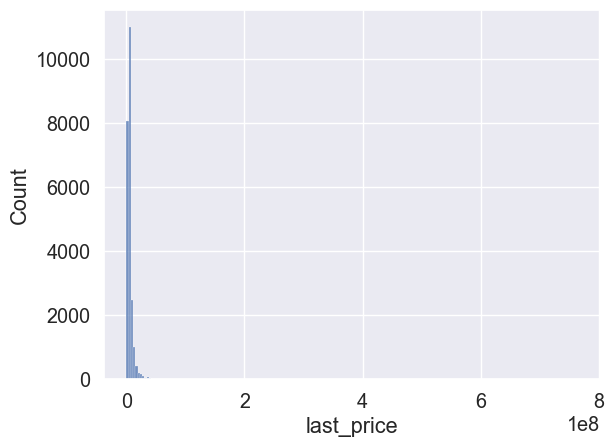

In [651]:
sns.histplot(data=df, x='last_price', bins=200)
plt.show()

***Выбросы связаны с неравномерным распределением.***

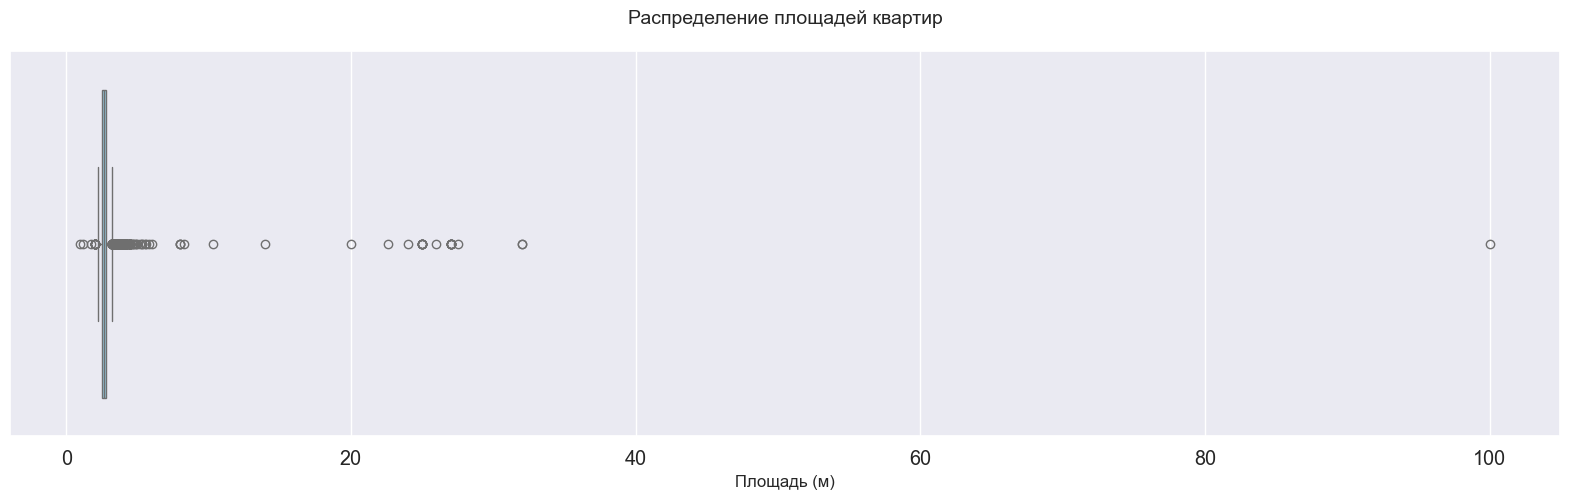

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [654]:
plt.figure(figsize=(20, 5))

sns.boxplot(x=df['ceiling_height'], color='skyblue')

plt.title('Распределение площадей квартир', fontsize=14, pad=20)
plt.xlabel('Площадь (м)', fontsize=12)
plt.grid(axis='x', alpha = 1)

plt.show()
df['ceiling_height'].describe()

### Часть 4. Комплексные выводы по результатам исследования. Расширенный анализ

<div class="alert alert-block alert-warning">
<b> 20. Сделайте комплексные выводы по результатам анализа. Дополнительно необходимо выполнить коды, позволяющие ответить на следующие вопросы:

* Как  благоустройство района влияет на стоимость квартир (пруды, парки и т.д.)?
* В каких населенных пунктах самые большие по жилой площади квартиры?
* Правда ли, что в центральных районах чаще всего продаются квартиры-студии? 
</b>
</div>

В наибольшей степени цена квартир заивист от площади помещения. В среднем необходимо 180 дней(6 месяцев) для продажи квартиры. Число парков и водоемов слабо влияют на цену квартиры (Коэффициент корреляции Пирсона <0.3). В Санкт-Петербурге находятся самые большие по жилой площади квартиры. Квартиры-студии находятся за пределами центра Санкт-Петербурга, их цена нестабильна ( последний график).

In [885]:
df.days_exposition.mean()

180.88863436982163

In [754]:
df[['last_price', 'parks_around3000', 'ponds_around3000']].corr().last_price

last_price          1.000000
parks_around3000    0.151058
ponds_around3000    0.159996
Name: last_price, dtype: float64

1) ВЫВОД
Число парков и водоемов слабо влияют на цену квартиры. (Коэффициент корреляции Пирсона <0.3)

In [661]:
df[['living_area', 'locality_name']].sort_values(by = 'living_area', ascending=False).head(300).groupby(by='locality_name').count().sort_values(by = 'living_area', ascending=False)

,living_area
locality_name,
Санкт-Петербург,287
Пушкин,4
Выборг,1
Гатчина,1
Колпино,1
Красное Село,1
Сестрорецк,1
деревня Бор,1
деревня Новое Девяткино,1


2) ВЫВОД В таблице выше представлены районы с самыми большими по жилой площади квартирами.

In [749]:
df_near_centre = df[['cityCenters_nearest', 'studio']].sort_values(by = 'cityCenters_nearest', ascending=True)
df_near_centre[df_near_centre.cityCenters_nearest < 5000].groupby('studio').count()

,cityCenters_nearest
studio,
False,2075
True,6


3) ВЫВОД
Среди 2081 квартир, находящихся в 6 километрах от центра Санкт-Петербурга только шесть квартир являются студиями. Гипотеза о том, что в центре находится большое количество квартир-студий неверна.

In [893]:
df['year'] = df.first_day_exposition.dt.to_period("Y")
df_for_studio_visualisation = pd.DataFrame(df[df.studio][['last_price']]).groupby(df.year).mean().reset_index()

In [848]:
df_for_studio_visualisation

,year,last_price
0,2015,2.460000e+06
1,2016,2.770692e+06
2,2017,3.469435e+06
3,2018,2.841552e+06
4,2019,3.144000e+06


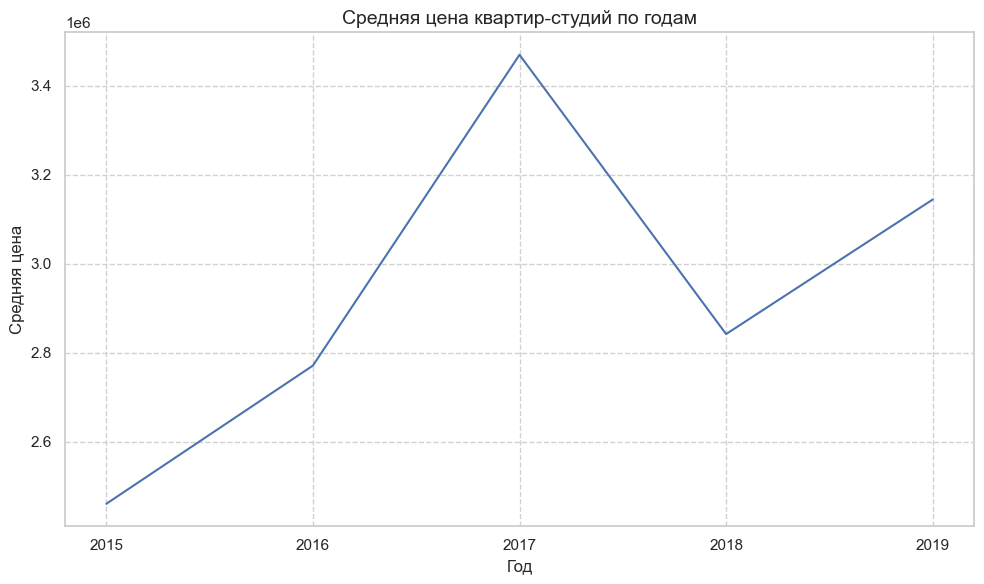

In [880]:
plt.figure(figsize=(10, 6))
plt.plot(df_for_studio_visualisation['year'].astype(str), df_for_studio_visualisation['last_price'])

plt.title('Средняя цена квартир-студий по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средняя цена', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()

In [12]:

df.loc[3:7, 'total_images']

AttributeError: 'bool' object has no attribute 'loc'